In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

In [3]:
from helper import points_extraction, corners_unwarp, abs_sobel_thresh, mag_thresh, dir_threshold, hls_select
from helper import hist, find_lane_pixels, fit_polynomial, fit_poly, search_around_poly, measure_curvature_pixels
from helper import measure_curvature_real, region_of_interest

# Camera Calibration and Distortion Correction Steps

In [4]:
# make list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

(objpoints, imgpoints, retlist) = points_extraction(images, nx=9, ny=6)

Text(0.5,1,'Undistorted Image')

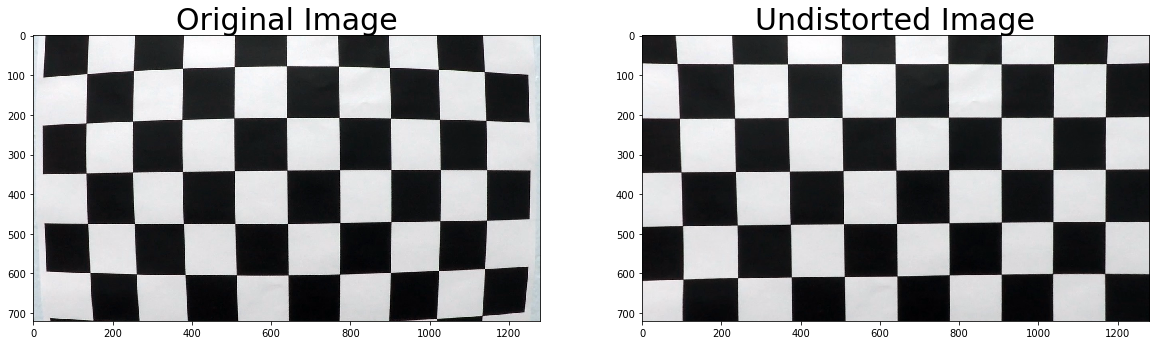

In [5]:
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)


dst = cv2.undistort(img, mtx, dist, None, mtx)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

# Color & Gradient Threshold Step

In [6]:
def color_gradient_pipline(img, s_thresh=(125, 255), sx_thresh=(50, 90), m_thresh=(55, 110)):
    img = np.copy(img)
    
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    
    # Sobel x
    sx_binary = abs_sobel_thresh(l_channel, orient='x', sobel_kernel=5, sob_thresh=sx_thresh)
    
    # Magnitude
    mag_binary = mag_thresh(l_channel, sobel_kernel=9, mag_thresh=m_thresh)
    
    # Threshold color channel
    s_binary = hls_select(img, thresh=s_thresh)
    
    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sx_binary)
    combined_binary[(s_binary == 1) | (sx_binary == 1) | (mag_binary == 1)] = 1

    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sx_binary), sx_binary, s_binary)) * 255
    return color_binary, combined_binary, sx_binary, s_binary

In [7]:
def show_color_gradient_pipline(img):
    # color_binary, combined_binary, sx_binary, s_binary = color_gradient_pipline(img, \
    #                                                                        s_thresh=(150, 255), \
    #                                                                        sx_thresh=(10,100))
    
    # color_binary, combined_binary, sx_binary, s_binary = color_gradient_pipline(image, \
    #                                                                        s_thresh=(125, 255), \
    #                                                                        sx_thresh=(25,90))

    color_binary, combined_binary, sx_binary, s_binary = color_gradient_pipline(image, \
                                                                            s_thresh=(125, 255), \
                                                                            sx_thresh=(50,90), m_thresh=(55, 110))
                                                                                
    # Plot the result
#     f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
#     f.tight_layout()

#     ax1.imshow(sx_binary, cmap='gray')
#     ax1.set_title('sx_binary', fontsize=40)

#     ax2.imshow(s_binary, cmap='gray')
#     ax2.set_title('s_binary', fontsize=40)
#     plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()

    ax1.imshow(combined_binary, cmap='gray')
    ax1.set_title('Combined Image', fontsize=40)

    ax2.imshow(color_binary)
    ax2.set_title('Pipeline Result', fontsize=40)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

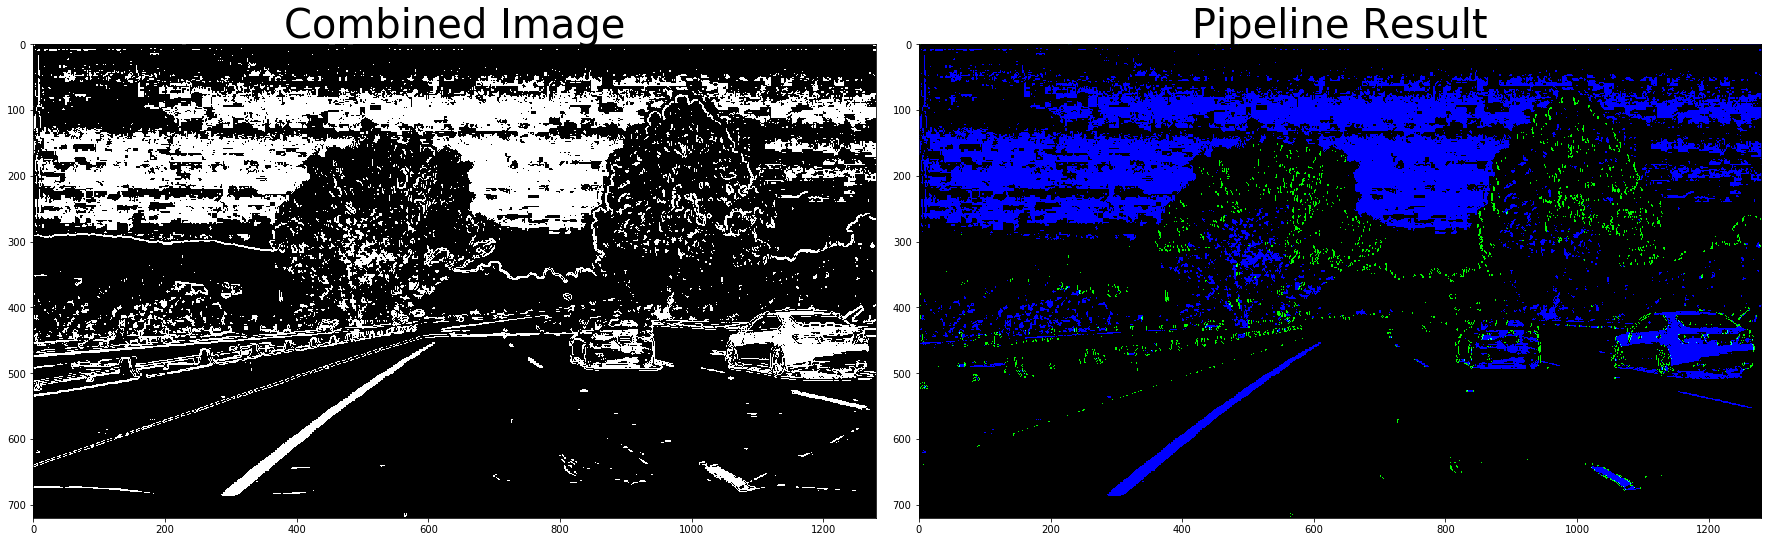

In [8]:
image = cv2.imread('test_images/test1.jpg')

show_color_gradient_pipline(image)

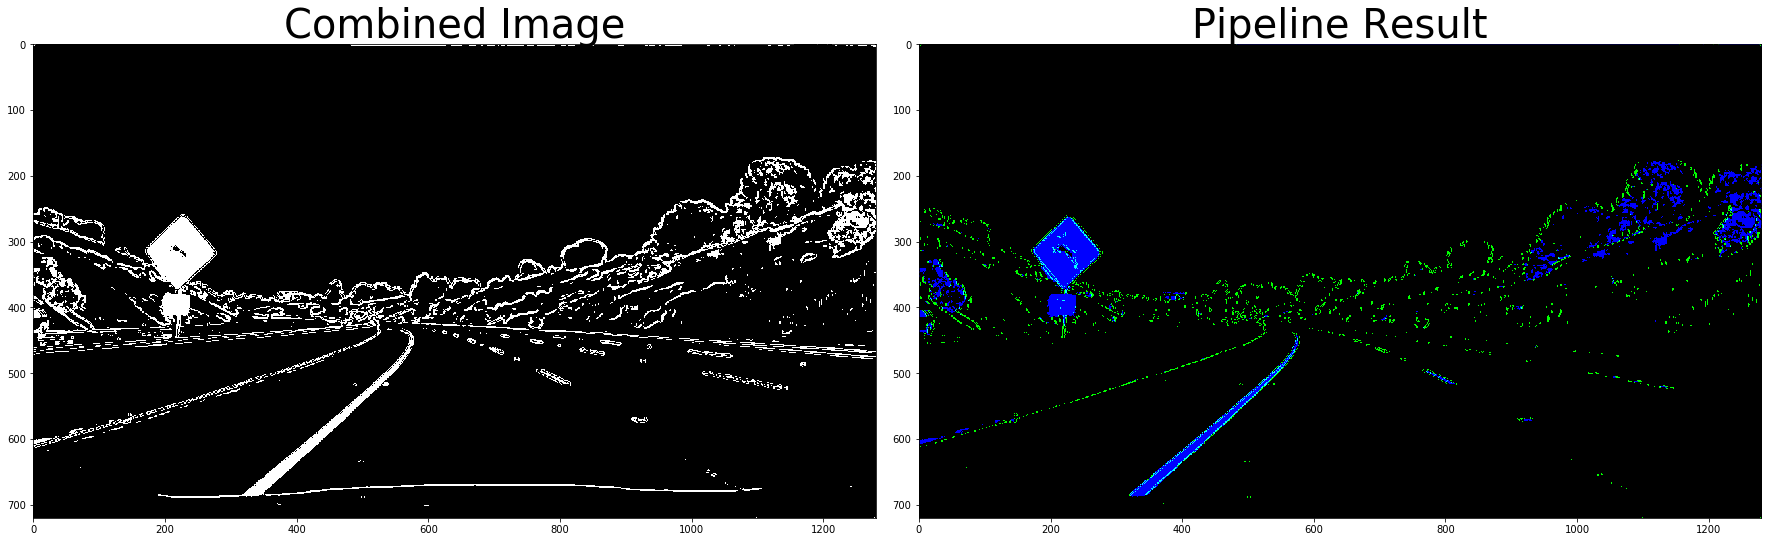

In [9]:
image = cv2.imread('test_images/test2.jpg')

show_color_gradient_pipline(image)

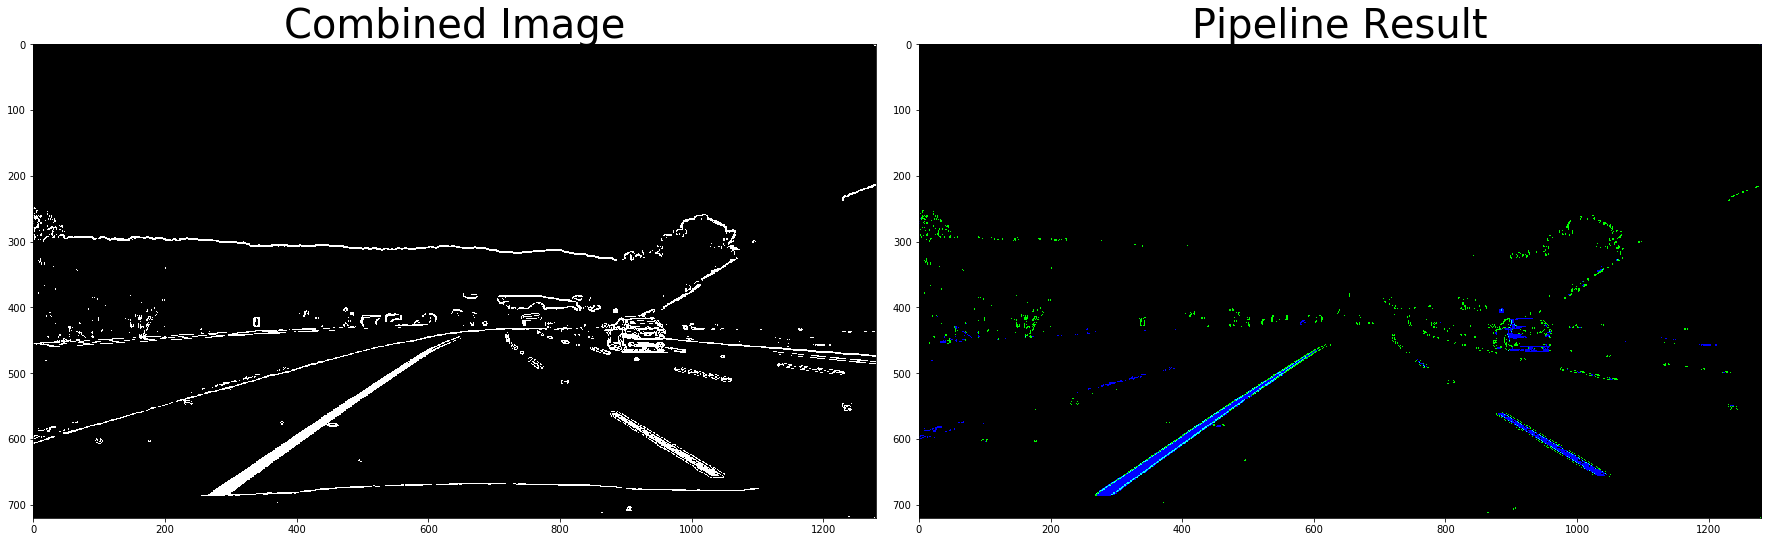

In [10]:
image = cv2.imread('test_images/test3.jpg')
show_color_gradient_pipline(image)

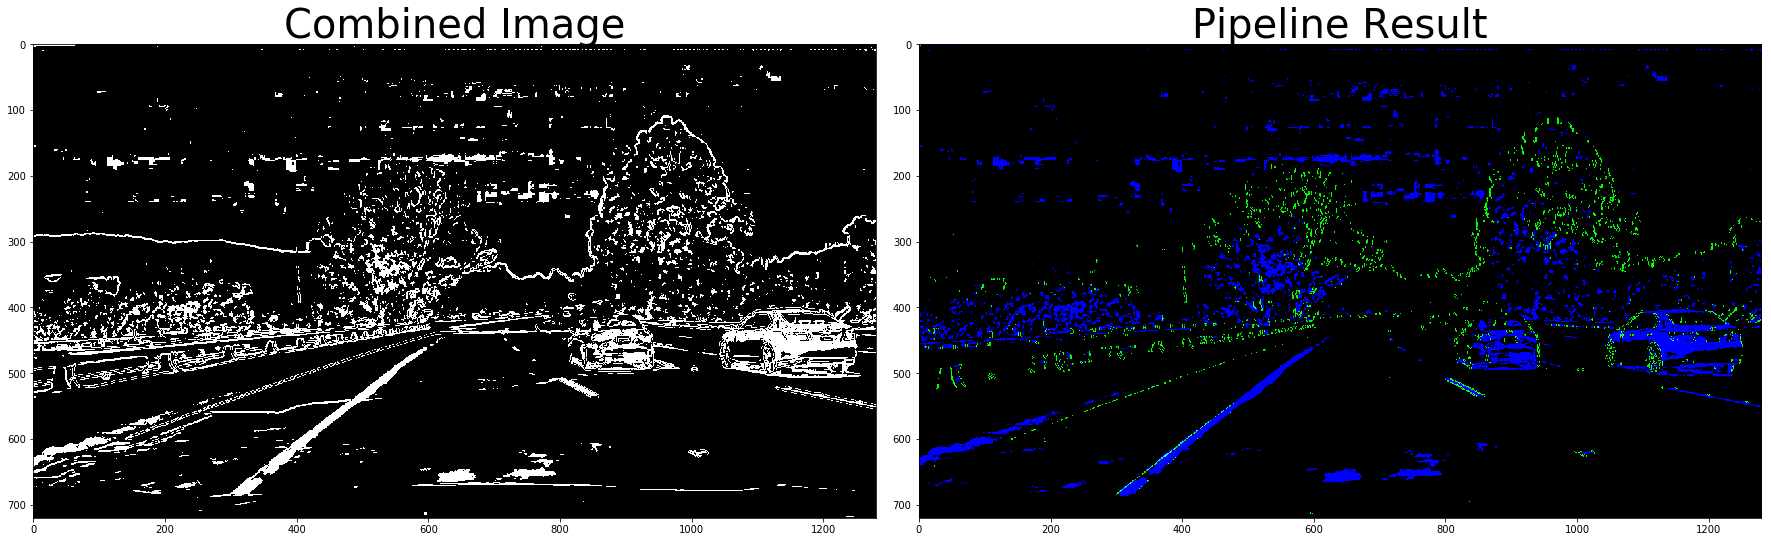

In [11]:
image = cv2.imread('test_images/test4.jpg')
show_color_gradient_pipline(image)

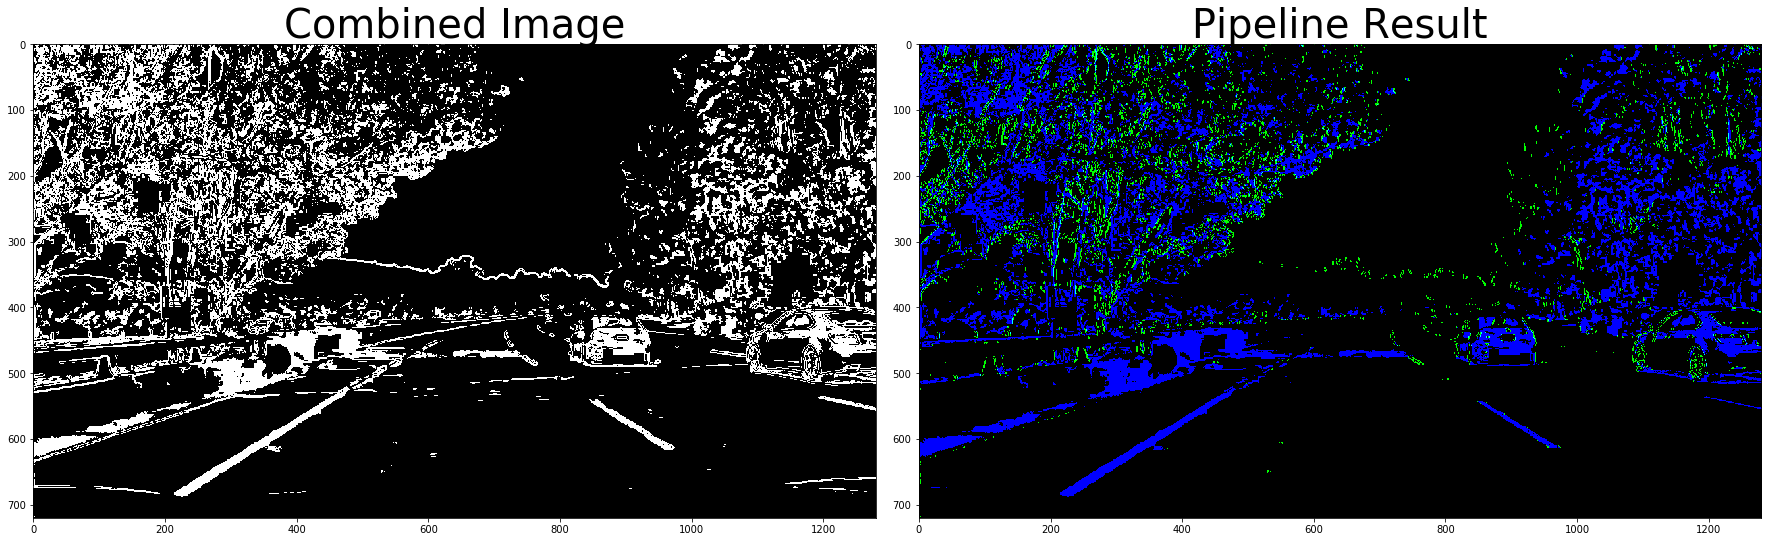

In [12]:
image = cv2.imread('test_images/test5.jpg')
show_color_gradient_pipline(image)

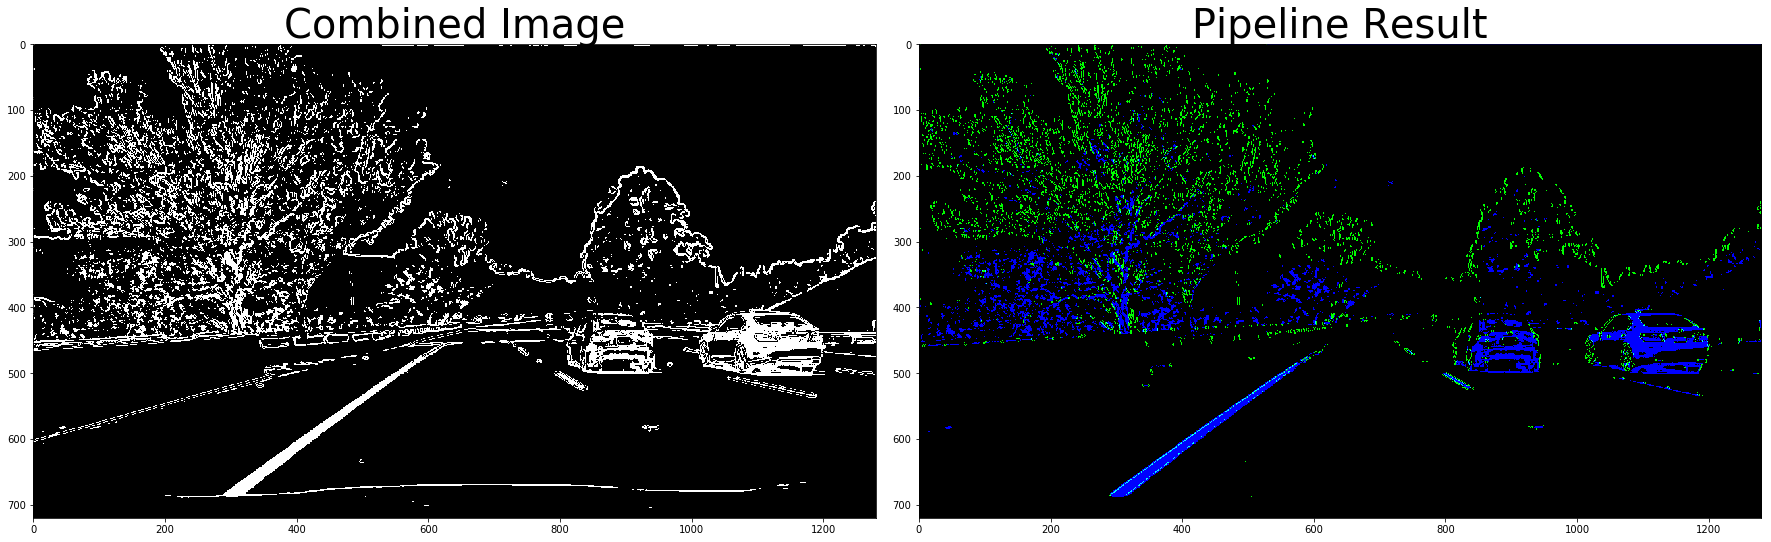

In [13]:
image = cv2.imread('test_images/test6.jpg')
show_color_gradient_pipline(image)

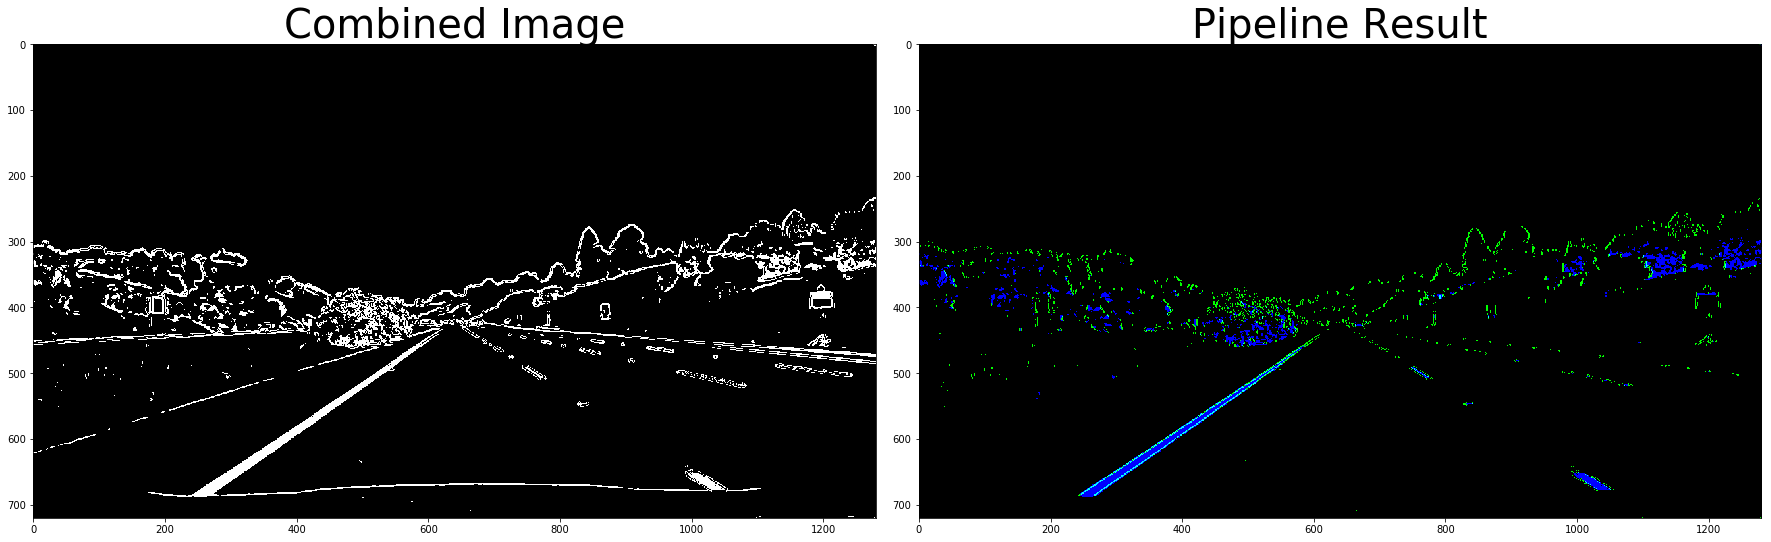

In [14]:
image = cv2.imread('test_images/straight_lines1.jpg')
show_color_gradient_pipline(image)

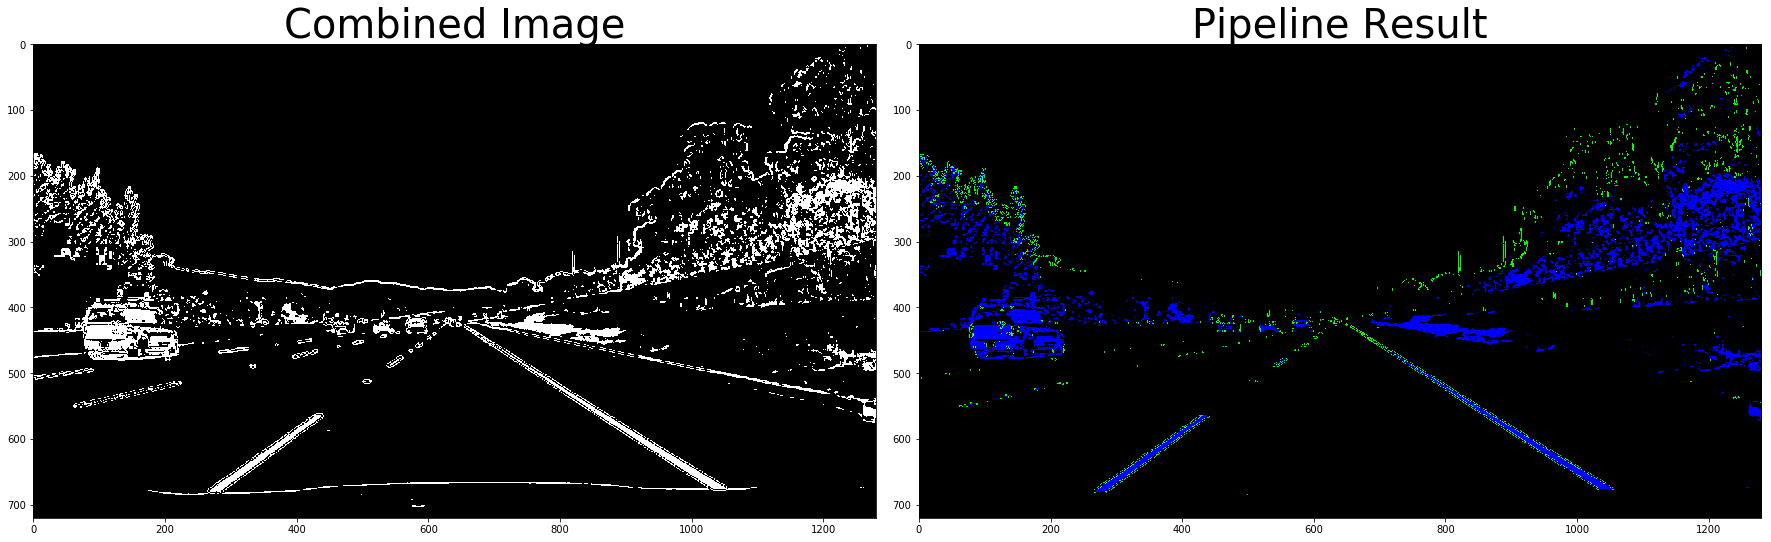

In [15]:
image = cv2.imread('test_images/straight_lines2.jpg')
show_color_gradient_pipline(image)

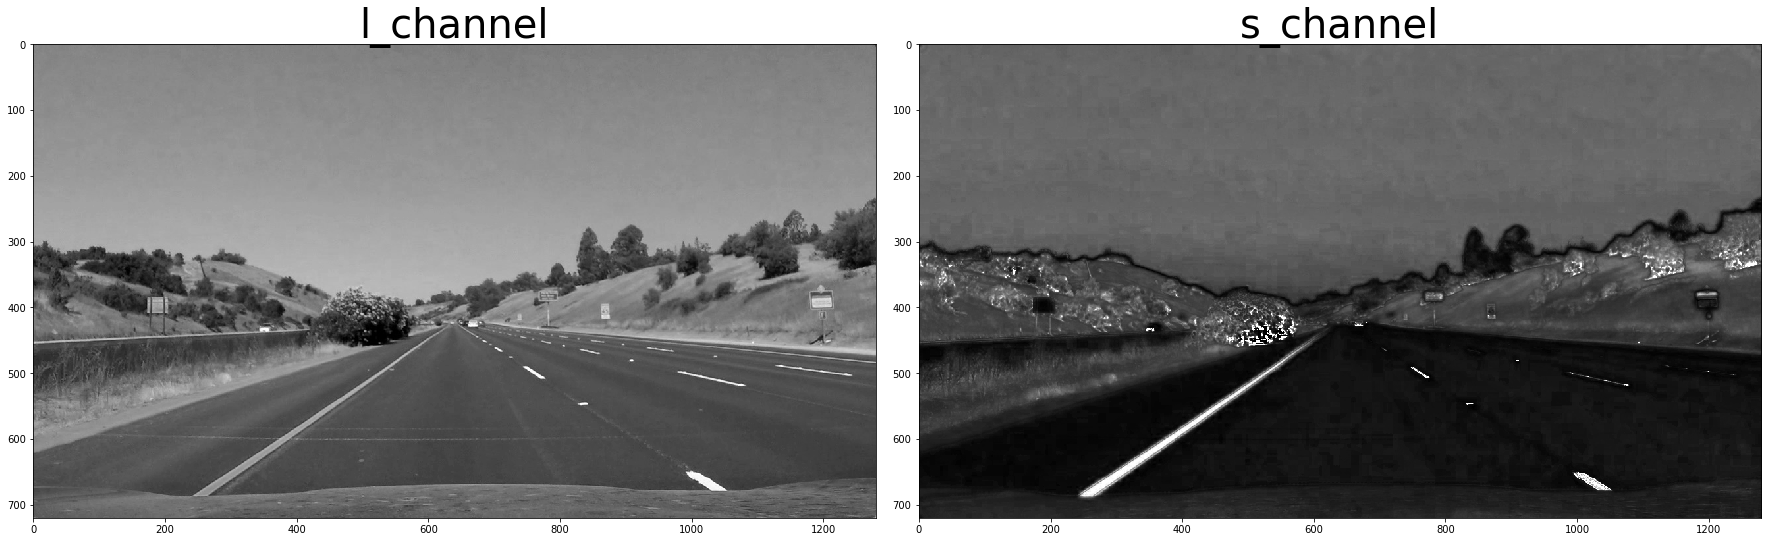

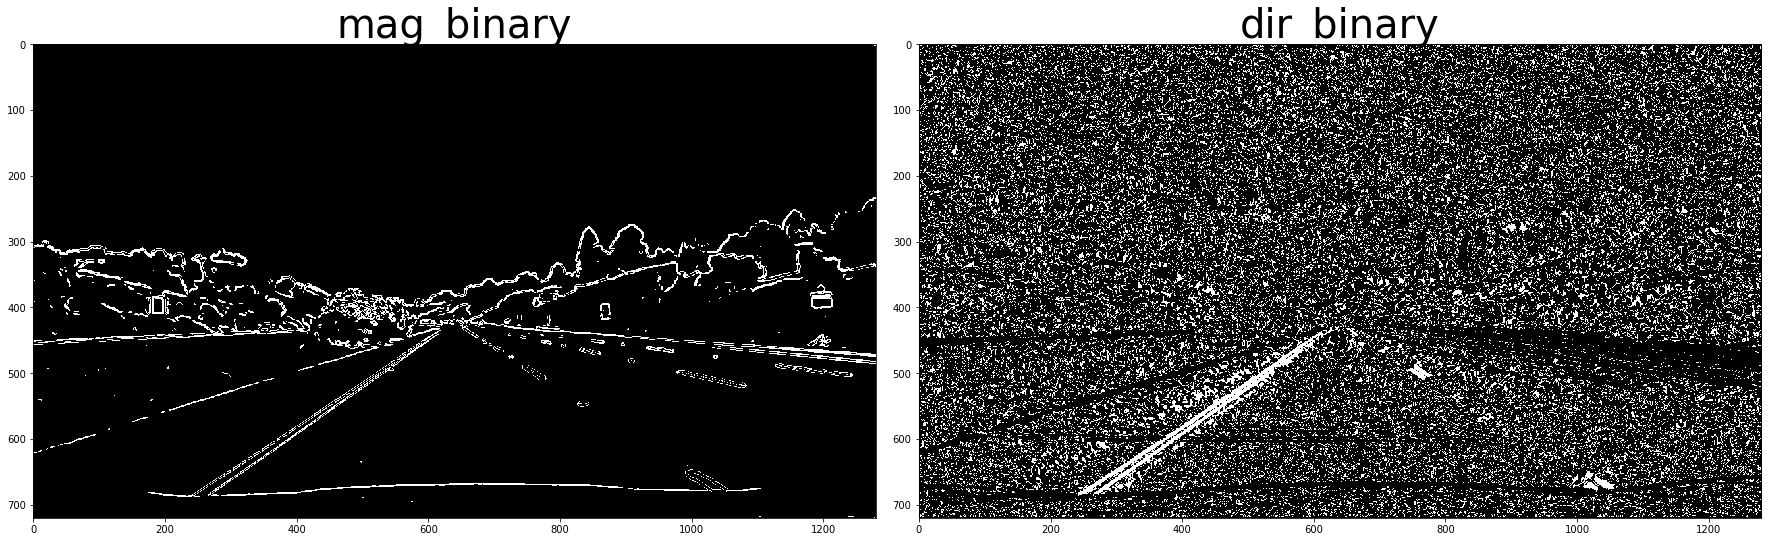

In [47]:
image = cv2.imread('test_images/test2.jpg')

# Convert to HLS color space and separate the V channel
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]

# mag_binary = mag_thresh(image, sobel_kernel=9, mag_thresh=(30, 100))

# dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))


mag_binary = mag_thresh(l_channel, sobel_kernel=9, mag_thresh=(55, 110))

dir_binary = dir_threshold(l_channel, sobel_kernel=13, thresh=(0.8, 1.1))

# Combine the two binary thresholds
combined_binary = np.zeros_like(dir_binary)
combined_binary[(mag_binary == 1) | (dir_binary == 1)] = 1


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(l_channel, cmap='gray')
ax1.set_title('l_channel', fontsize=40)

ax2.imshow(s_channel, cmap='gray')
ax2.set_title('s_channel', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)



f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(mag_binary, cmap='gray')
ax1.set_title('mag_binary', fontsize=40)

ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('dir_binary', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)



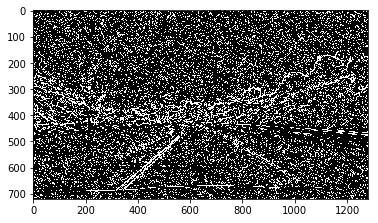

In [17]:
plt.imshow(combined_binary, cmap='gray')
plt.show()

# Region of Interest

In [27]:
def show_region_of_interest(image, region):
    cv2.line(image,(region[0][0], region[0][1]),
             (region[1][0], region[1][1]),[0, 0, 255],5)
    cv2.line(image,(region[1][0], region[1][1]),
             (region[2][0], region[2][1]),[0, 0, 255],5)
    cv2.line(image,(region[2][0], region[2][1]),
             (region[3][0], region[3][1]),[0, 0, 255],5)
    cv2.line(image,(region[3][0], region[3][1]),
             (region[0][0], region[0][1]),[0, 0, 255],5)

1280
720


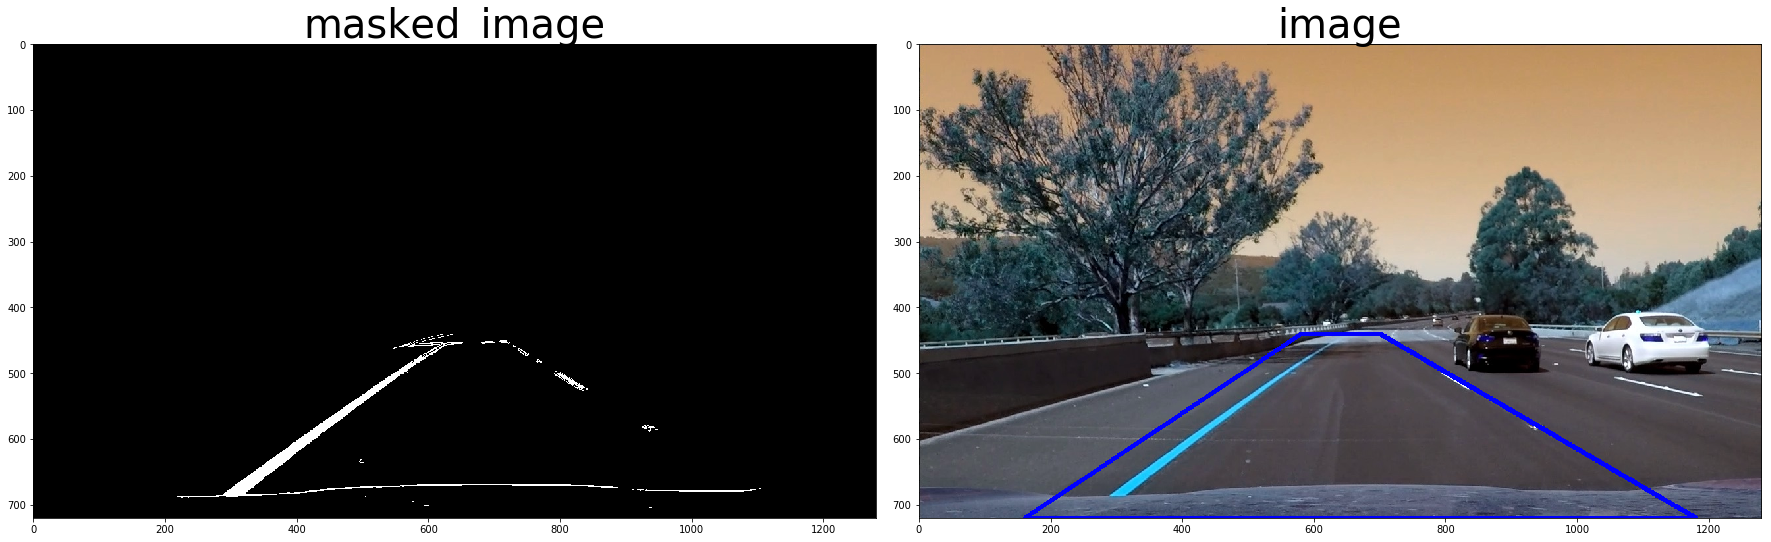

In [74]:
image = cv2.imread('test_images/test6.jpg')

#image = cv2.imread('test_images/straight_lines2.jpg')


color_binary, combined_binary, sx_binary, s_binary = color_gradient_pipline(image, \
                                                                            s_thresh=(125, 255), \
                                                                            sx_thresh=(50,90), m_thresh=(55, 110))

# getting image shape
imshape = combined_binary.shape

print(imshape[1])
print(imshape[0])

# setting up region in which we are interested in
vertices = np.array([[(160,imshape[0]),(imshape[1]//2-60, imshape[0]//2+80), 
                      (imshape[1]/2+60, imshape[0]//2+80), (imshape[1]-100,imshape[0])]], dtype=np.int32)


masked_image = region_of_interest(combined_binary, vertices)

show_region_of_interest(image, vertices[0])

# plt.imshow(masked_image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(masked_image, cmap='gray')
ax1.set_title('masked_image', fontsize=40)

ax2.imshow(image, cmap='gray')
ax2.set_title('image', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
